#**Data Science Engineering Methods and Tools**

## **Assignment 4** – Model Interpretability

**Name** - Rituja Lolam

**Nuid** - 002146428

# **Abstract**
Insurance claims are the need of the hour with a widespread of different viruses  which have a global impact. It is now an important factor to track the insurance charges
In the recent times, there has been a gradual growth in the insurance charges required for a particular individual. These charges are dependent on series of factors such as sex, bmi, children, smoker, age which affects the insurance charges.

In the below notebook, I have used various models such as Linear Regression, Decision Tree Regressor, Random Forest Regressor and AutoML. On these models I have used LIME and SHAP methods to understand the features better.

**Columns:**

* age: age of primary beneficiary

* sex: insurance contractor gender: female(0), male(1)

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,

* children: Number of children covered by health insurance 

* smoker: Smoker(1),Non-smoker(0)

* region: the beneficiary's residential area in the US: southwest
southeast,northwest,northeast

* charges: Individual medical costs billed by health insurance

# Importing Libraries

In [1]:
!pip install shap
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [2]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy.orm import mapper
from sklearn.ensemble import RandomForestRegressor
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


# Importing the dataset

In [3]:
#Data is stored in the github account
data = pd.read_csv(r"https://github.com/Ritujauni/Data-Science/raw/main/DS_insurance.csv")

In [4]:
print(f"Mean value of median house prices : {round(data['charges'].mean(), 2)}")

Mean value of median house prices : 13270.42


In [5]:
#Assigning the values for encoding
data['sex'] = data.sex.map({'male':0, 'female':1})
data['smoker'] = data.smoker.map({'no':0, 'yes':1})
data.head(10)

age  sex     bmi  children  smoker     region      charges
0   19    1  27.900         0       1  southwest  16884.92400
1   18    0  33.770         1       0  southeast   1725.55230
2   28    0  33.000         3       0  southeast   4449.46200
3   33    0  22.705         0       0  northwest  21984.47061
4   32    0  28.880         0       0  northwest   3866.85520
5   31    1  25.740         0       0  southeast   3756.62160
6   46    1  33.440         1       0  southeast   8240.58960
7   37    1  27.740         3       0  northwest   7281.50560
8   37    0  29.830         2       0  northeast   6406.41070
9   60    1  25.840         0       0  northwest  28923.13692

Converting the categorical features sex,smoker to numerical values

##Linear Regression

In [6]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data2=data.drop(columns=['region'])

X = data2.drop('charges', axis=1)
y = data2['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [7]:
def evaluate(X, y, mapper=None, reg=None, transform=False):
    if transform:
        X = mapper.transform(X)
        X = sm.add_constant(X, has_constant='add') 
    y_pred = reg.predict(X)
    return mean_absolute_error(y, y_pred)

In [8]:
numerical_features = [c for c in X_train.columns ]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num, df_out=True)
preprocessed_X_train = mapper.fit_transform(X_train)
preprocessed_X_train = sm.add_constant(preprocessed_X_train)
reg = sm.OLS(y_train, preprocessed_X_train).fit()

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [9]:
train_mae = evaluate(X_train, y_train, mapper, reg, True)
test_mae = evaluate(X_test, y_test, mapper, reg, True)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 4151.216, test MAE = 4327.259 


In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [10]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     710.3
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        03:44:20   Log-Likelihood:                -12186.
No. Observations:                1204   AIC:                         2.438e+04
Df Residuals:                    1198   BIC:                         2.441e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.323e+04    173.780     76.118      0.000    1.29e+04    1.36e+04
age         3565.5134    175.106     20.362      0.000    3221.964    3909.062
sex          126.6139    174.515      0.726      0.468    -215.774     469.002
bmi         1935.6414    174.992     11.061      0.000    1592.317    2278.966
children     460.8134    173.880      2.650      0.008     119.670     801.957
smoker      9527.6408    174.314     54.658      0.000    9185.647    9869.635
==============================================================================
Omnibus:                      258.090   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              574.949
Skew:                           1.185   Prob(JB):                    1.42e-125
Kurtosis:                       5.418   Cond. No.                         1.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



The t-score and p-value of smoker indicates that it has the highest significance on the target variable. However bmi too plays a significant role. sex is the least significant.

# Random Forest Regressor



In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

numerical_features = [c for c in X_train.columns ]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num , df_out=True)
reg = RandomForestRegressor()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

train_mae = evaluate(X_train, y_train, reg=pipeline)
test_mae = evaluate(X_test, y_test, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 1017.048, test MAE = 2750.474 


<BarContainer object of 5 artists>

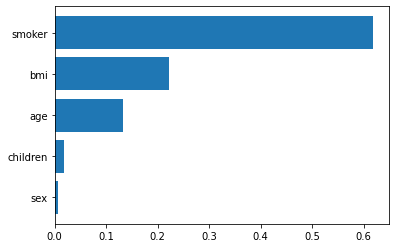

In [12]:
sorted_idx = reg.feature_importances_.argsort()
features = numerical_features 
result = sorted(zip(features, reg.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])



*   From the above feature importance graph, we can observe that smoker, bmi and age are the most important features. 
*   Children and Sex are the least important features



# Decision Tree Regressor

In [13]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)
y_pred = DecisionTreeRegressorModel.predict(X_test)
r2_score(y_pred, y_test)

print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test))

DecisionTreeRegressor Train Score is :  0.8559594262693936
DecisionTreeRegressor Test Score is :  0.8649528933184469


**Node Interpreability**

[Text(0.5, 0.875, 'X[4] <= 0.5\nsquared_error = 143437710.25\nsamples = 1204\nvalue = 13227.77'),
 Text(0.25, 0.625, 'X[0] <= 42.5\nsquared_error = 36030807.377\nsamples = 963\nvalue = 8509.858'),
 Text(0.125, 0.375, 'X[3] <= 0.5\nsquared_error = 22394020.269\nsamples = 529\nvalue = 5385.522'),
 Text(0.0625, 0.125, 'squared_error = 17999080.765\nsamples = 226\nvalue = 3877.697'),
 Text(0.1875, 0.125, 'squared_error = 22711486.462\nsamples = 303\nvalue = 6510.171'),
 Text(0.375, 0.375, 'X[0] <= 51.5\nsquared_error = 26251752.772\nsamples = 434\nvalue = 12318.093'),
 Text(0.3125, 0.125, 'squared_error = 21703967.339\nsamples = 185\nvalue = 10253.41'),
 Text(0.4375, 0.125, 'squared_error = 24110243.286\nsamples = 249\nvalue = 13852.094'),
 Text(0.75, 0.625, 'X[2] <= 30.01\nsquared_error = 128276595.46\nsamples = 241\nvalue = 32079.843'),
 Text(0.625, 0.375, 'X[0] <= 41.0\nsquared_error = 24054867.55\nsamples = 112\nvalue = 21253.285'),
 Text(0.5625, 0.125, 'squared_error = 12434671.435\ns

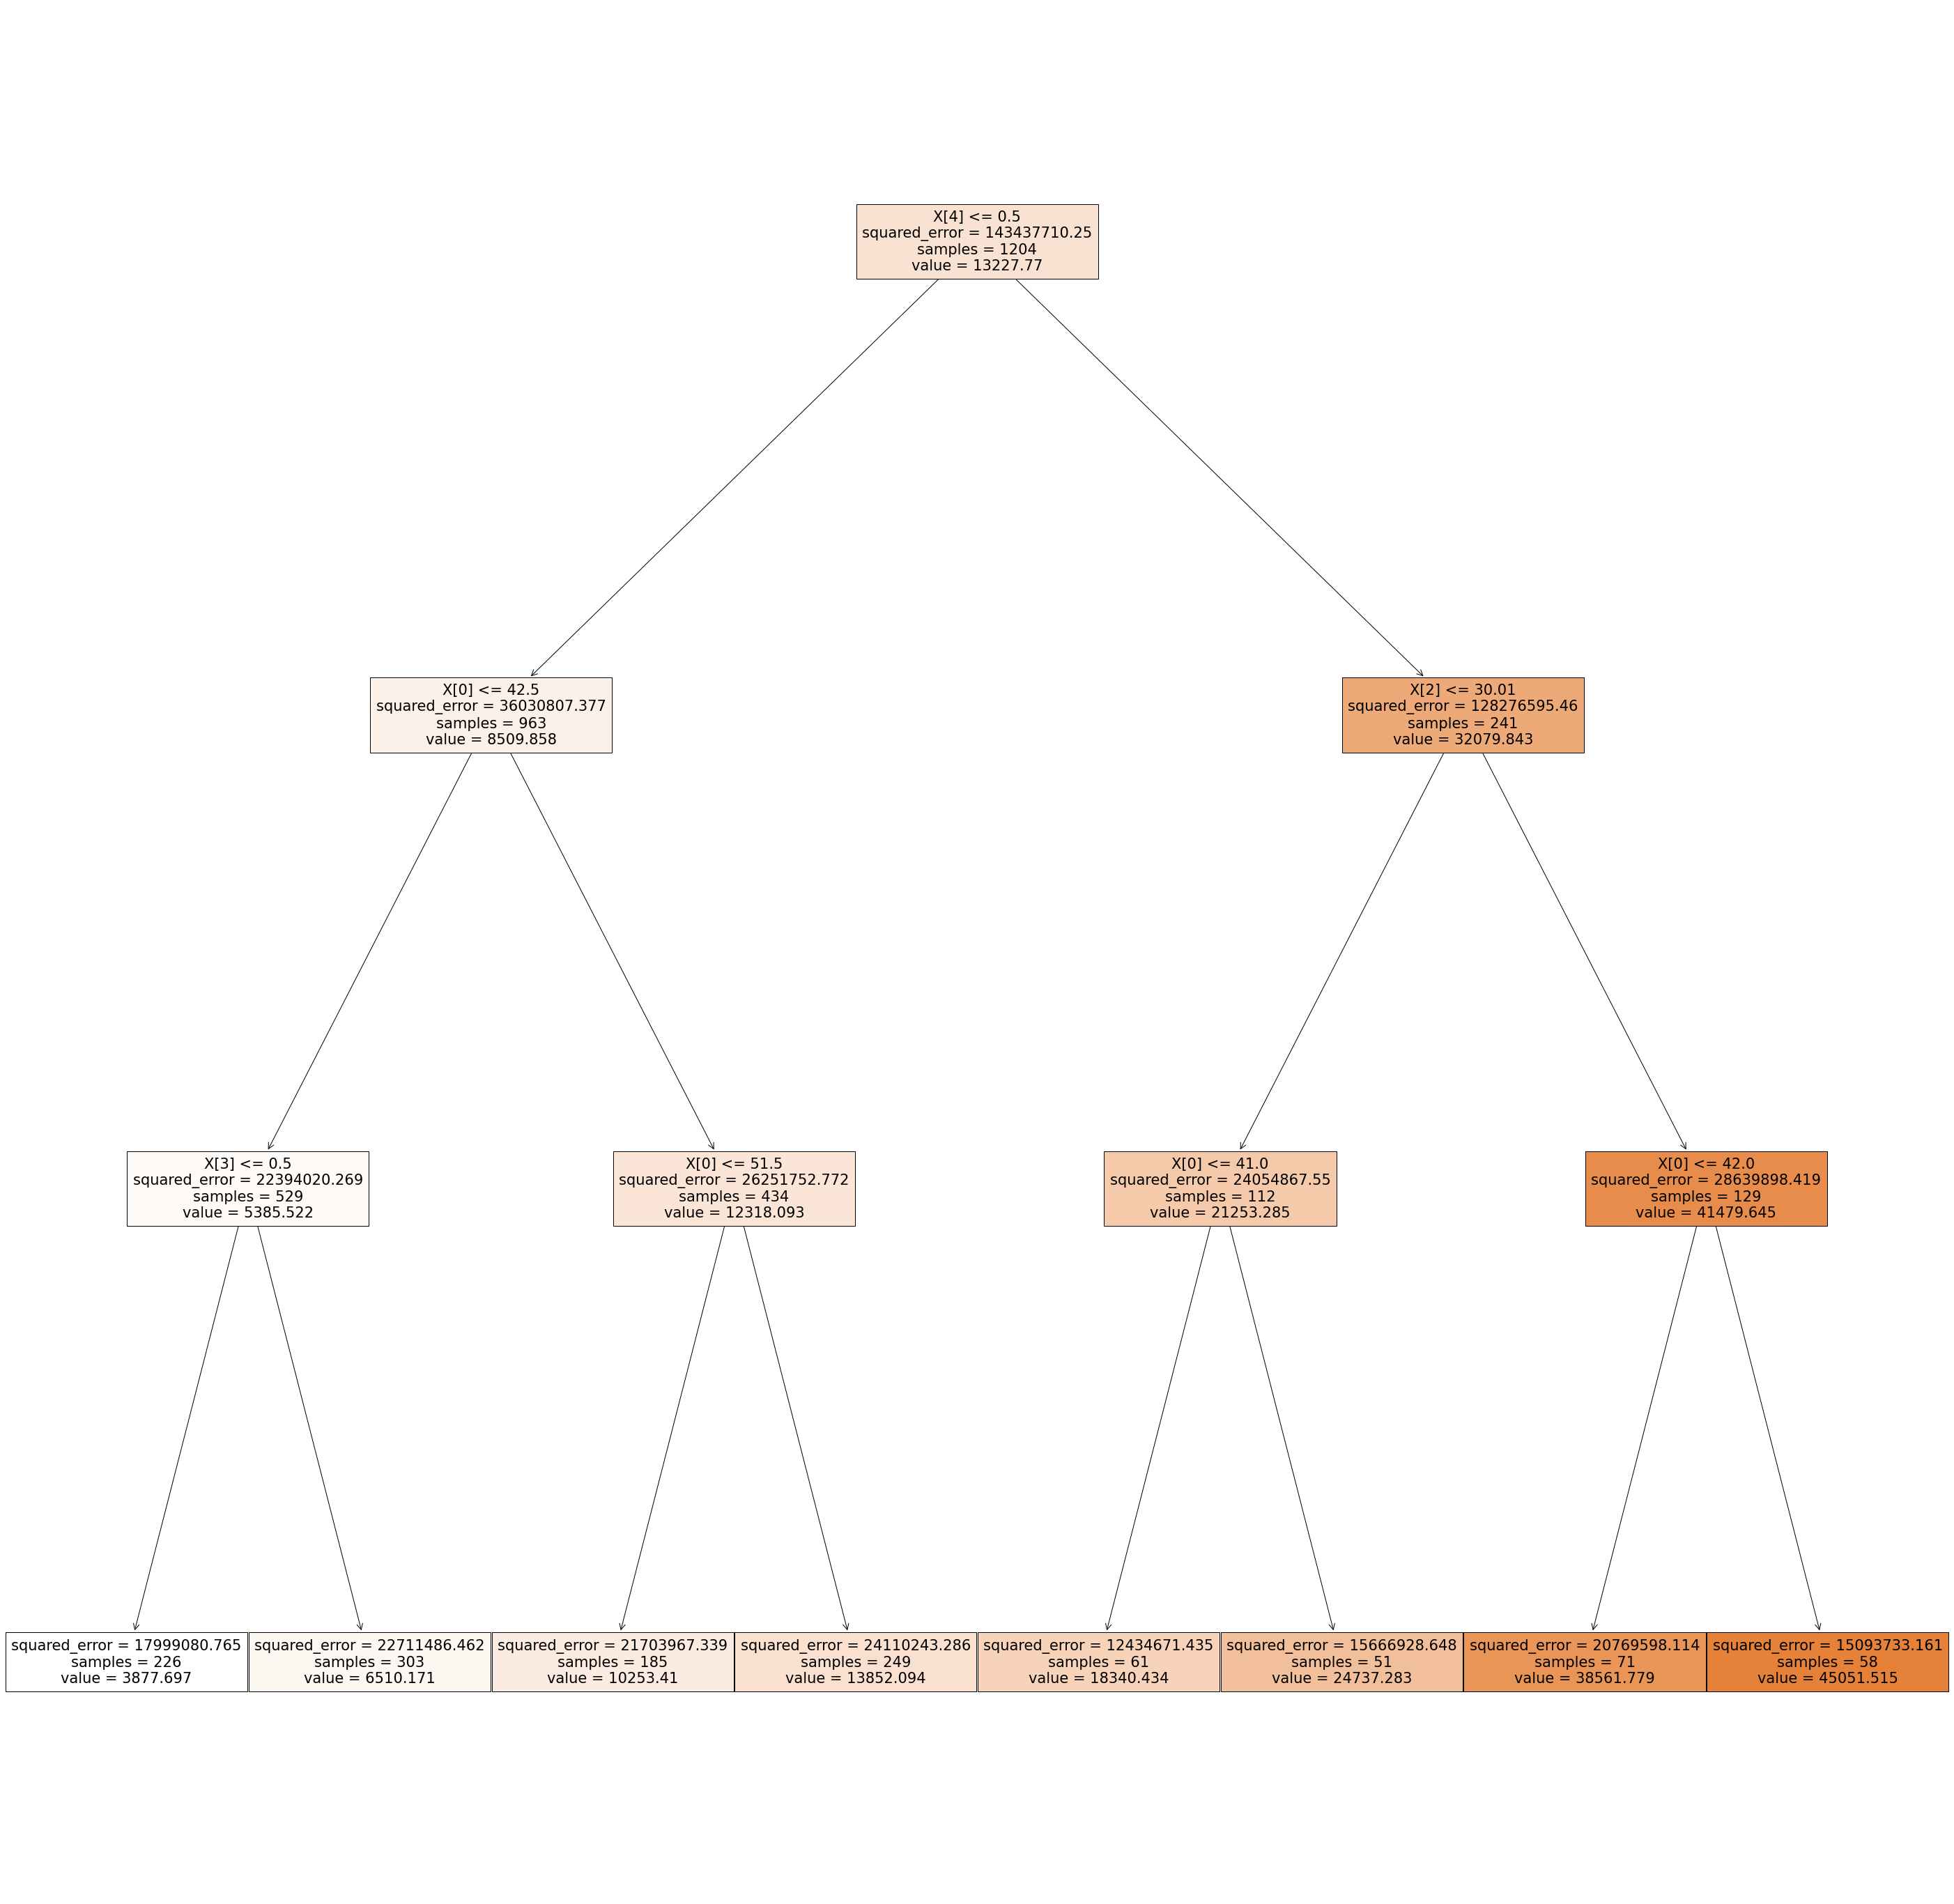

In [14]:
plt.figure(figsize=(50,50))
plot_tree(DecisionTreeRegressorModel, filled=True)

# Auto ML

In [15]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [16]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

4


In [17]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:53083 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14.1" 2022-02-08; OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvcfgaajh
  JVM stdout: /tmp/tmpvcfgaajh/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvcfgaajh/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:53083
Connecting to H2O server at http://127.0.0.1:53083 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.1.1
H2O_cluster_version_age:    11 days
H2O_cluster_name:           H2O_from_python_unknownUser_py5j6s
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:53083
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.13 final
--------------------------  ----------------------------------

**Importing dataset**

In [18]:
# Import the dataset from Github
url = "https://github.com/Ritujauni/Data-Science/raw/main/insurance.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [19]:
df.head()

age sex bmi children smoker region charges 
 
 
 19 0 27.9 0 1 1 16884.9 
 18 1 33.77 1 0 2 1725.55 
 28 1 33 3 0 2 4449.46 
 33 1 22.705 0 0 3 21984.5 
 32 1 28.88 0 0 3 3866.86 
 31 0 25.74 0 0 2 3756.62 
 46 0 33.44 1 0 2 8240.59 
 37 0 27.74 3 0 3 7281.51 
 37 1 29.83 2 0 4 6406.41 
 60 0 25.84 0 0 3 28923.1

In [20]:
#Dropping Region column
df = df.drop('region',1)

In [21]:
df.types

{'age': 'int',
 'bmi': 'real',
 'charges': 'real',
 'children': 'int',
 'sex': 'int',
 'smoker': 'int'}

In [22]:
df.shape

(1338, 6)

**Creating Train/Test split**

In [23]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [24]:
print(df_train.shape)
print(df_test.shape)

(1060, 6)
(278, 6)


**Setting target and predictor variables**

In [25]:
# Set the features and target
X=df.columns
print(X)

['age', 'sex', 'bmi', 'children', 'smoker', 'charges']


In [26]:
y ='charges'
X.remove(y) 
print(X)

['age', 'sex', 'bmi', 'children', 'smoker']


**Setting up AutoML**

In [27]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1,exclude_algos = ["StackedEnsemble"])

In [28]:
aml.train(x=X,y=y,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20220425_34435_model_2


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               40.0                      40.0               9938.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        4.0        4.0         4.0        12.0        16.0       15.175



ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 15628352.127636027
RMSE: 3953.271066804808
MAE: 2187.6185505417156
RMSLE: 0.38477543204929665
Mean Residual Deviance: 15628352.127636027

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 20496009.586451743
RMSE: 4527.251880164361
MAE: 2544.032636234549
RMSLE: 0.4439625751709157
Mean Residual Deviance: 20496009.586451743

Cross-Validation Metrics Summary: 


mean            sd    cv_1_valid  \
0                     mae  2.534695e+03  1.699458e+02  2.835007e+03   
1  mean_residual_deviance  2.071251e+07  4.268752e+06  2.800163e+07   
2                     mse  2.071251e+07  4.268752e+06  2.800163e+07   
3                      r2  8.600015e-01  1.842671e-02  8.423446e-01   
4       residual_deviance  2.071251e+07  4.268752e+06  2.800163e+07   
5                    rmse  4.533342e+03  4.490427e+02  5.291656e+03   
6                   rmsle  4.457489e-01  2.497345e-02  4.812106e-01   

     cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid  
0  2.503470e+03  2.445404e+03  2.434108e+03  2.455489e+03  
1  2.029359e+07  1.886682e+07  1.686744e+07  1.953305e+07  
2  2.029359e+07  1.886682e+07  1.686744e+07  1.953305e+07  
3  8.690049e-01  8.825136e-01  8.396088e-01  8.665357e-01  
4  2.029359e+07  1.886682e+07  1.686744e+07  1.953305e+07  
5  4.504841e+03  4.343596e+03  4.106999e+03  4.419621e+03  
6  4.259498e-01  4.592066e-01  4.421443e-01  4.202331e-01


Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0    2022-04-25 03:45:53   1.523 sec              0.0   12232.708897   
1    2022-04-25 03:45:53   1.531 sec              5.0    8091.091700   
2    2022-04-25 03:45:53   1.538 sec             10.0    5879.260477   
3    2022-04-25 03:45:53   1.544 sec             15.0    4847.640230   
4    2022-04-25 03:45:53   1.551 sec             20.0    4387.259442   
5    2022-04-25 03:45:53   1.558 sec             25.0    4183.311223   
6    2022-04-25 03:45:53   1.564 sec             30.0    4072.427643   
7    2022-04-25 03:45:53   1.570 sec             35.0    4001.275734   
8    2022-04-25 03:45:53   1.576 sec             40.0    3953.271067   

   training_mae  training_deviance  
0   9215.632857       1.496392e+08  
1   6204.962422       6.546576e+07  
2   4434.117642       3.456570e+07  
3   3438.717232       2.349962e+07  
4   2848.406829       1.924805e+07  
5   2519.515605       1.750009e+07  
6   2335.271884       1.658467e+07  
7   2242.490242       1.601021e+07  
8   2187.618551       1.562835e+07


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0    smoker         5.288615e+11           1.000000    0.739893
1       bmi         9.918013e+10           0.187535    0.138756
2       age         7.545236e+10           0.142669    0.105560
3  children         1.055452e+10           0.019957    0.014766
4       sex         7.323782e+08           0.001385    0.001025

In [29]:
#Leaderboard
print(aml.leaderboard)

model_id rmse mse mae rmsle mean_residual_deviance 
 
 
 GBM_grid_1_AutoML_1_20220425_34435_model_2 4527.25 2.0496e+07 2544.03 0.443963 2.0496e+07 
 GBM_grid_1_AutoML_1_20220425_34435_model_54 4562.49 2.08163e+07 2605.47 0.447175 2.08163e+07 
 XGBoost_grid_1_AutoML_1_20220425_34435_model_43 4570.64 2.08907e+07 2562.23 0.445921 2.08907e+07 
 XGBoost_grid_1_AutoML_1_20220425_34435_model_29 4573.39 2.09159e+07 2585.47 0.446442 2.09159e+07 
 GBM_grid_1_AutoML_1_20220425_34435_model_25 4590.96 2.10769e+07 2606.95 0.439302 2.10769e+07 
 GBM_grid_1_AutoML_1_20220425_34435_model_34 4596.52 2.1128e+07 2619.48 0.451674 2.1128e+07 
 GBM_grid_1_AutoML_1_20220425_34435_model_42 4612.04 2.12709e+07 2554 0.453906 2.12709e+07 
 GBM_grid_1_AutoML_1_20220425_34435_model_43 4617.53 2.13216e+07 2602.15 0.451537 2.13216e+07 
 XGBoost_grid_1_AutoML_1_20220425_34435_model_23 4620.82 2.13519e+07 2583.61 0.451822 2.13519e+07 
 GBM_grid_1_AutoML_1_20220425_34435_model_73 4627.1 2.14101e+07 2584.41 0.450448 2.14101e+07

In [30]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GBM_grid_1_AutoML_1_20220425_34435_model_2': 0,
 'GLM_1_AutoML_1_20220425_34435': 142}

In [31]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

0


In [32]:
best_model.algo

'gbm'

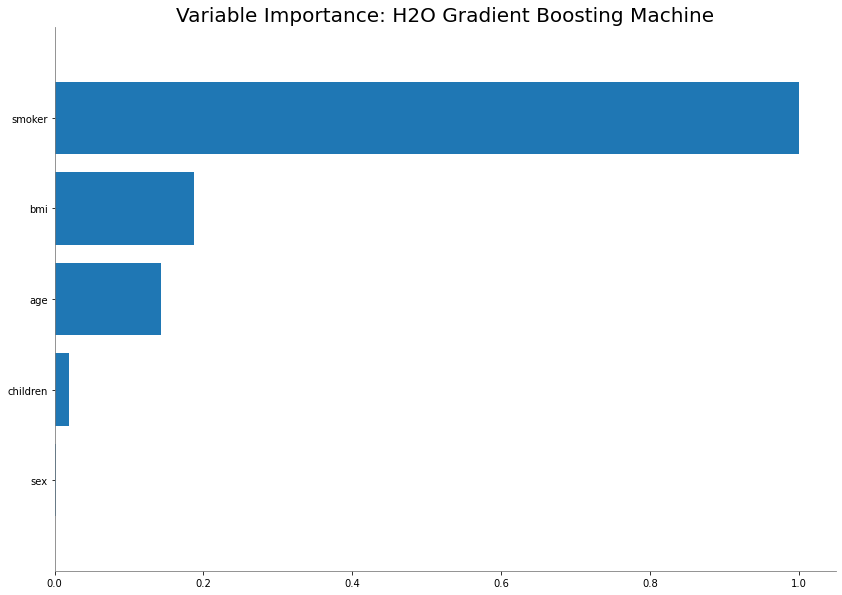

<Figure size 432x288 with 0 Axes>

In [33]:
best_model.varimp_plot()

# Partial Dependence Plots

In [34]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

Exact explainer: 135it [00:11,  1.11s/it]


In [35]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature, 
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

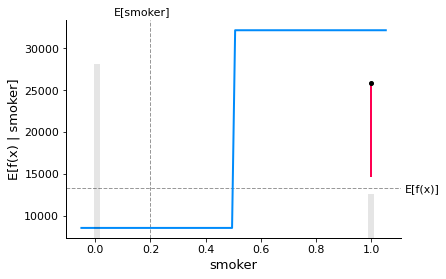

In [36]:
partial_dependence_plot('smoker', 0)

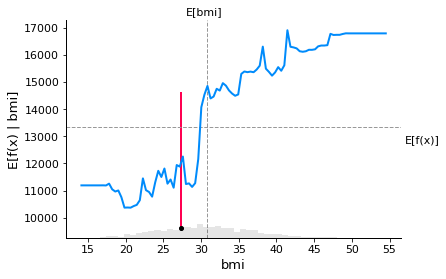

In [37]:
partial_dependence_plot('bmi', 0)

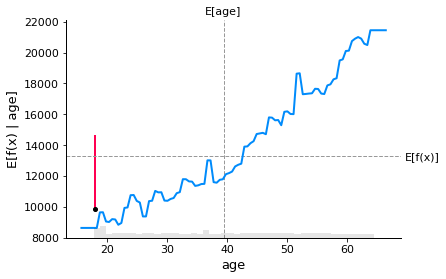

In [38]:
partial_dependence_plot('age', 0)

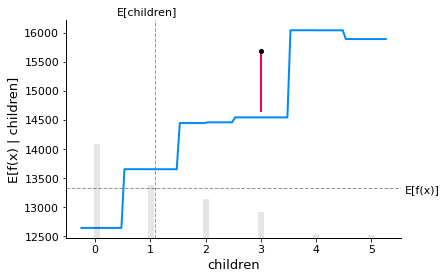

In [39]:
partial_dependence_plot('children', 0)

# Shap Plots

In [40]:
shap.initjs()

In [41]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

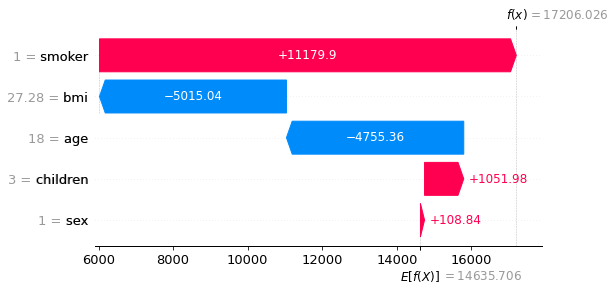

In [42]:
sample_feature_importance(0, 'waterfall')

In [43]:
shap.initjs()

sample_feature_importance(0, 'condensed')


# Feature Importance

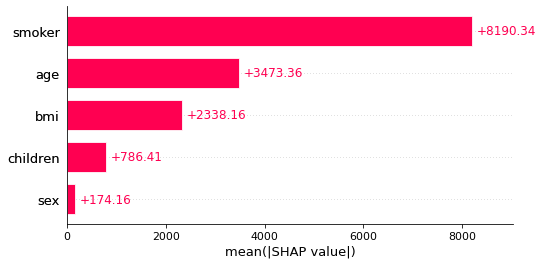

In [44]:
shap.plots.bar(shap_values)


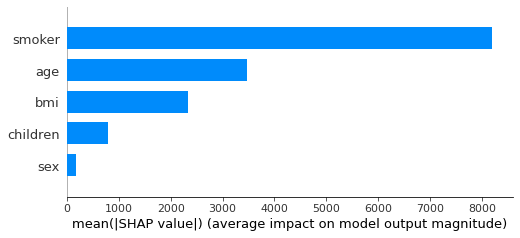

In [45]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

The features importance barplot  SHAP indicates that "smoker" is the most important feature with "age", while "sex" is the least important one.

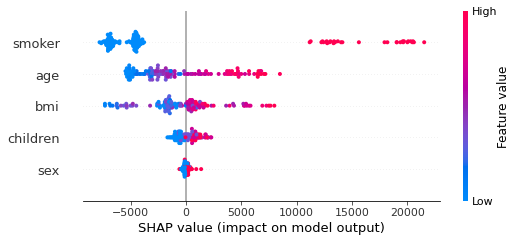

In [46]:
shap.plots.beeswarm(shap_values)

* The goal from this beeswarm plot is to identify the impact of each feature on the model's output. Features are ordered following the sum of SHAP value magnitudes across all samples.
* X-axis is for the SHAP values (impact on model) and y-axis is for the feature values (red indicates high values while blue indicate low values of the feature).
* From this plot we can notice that high values of "smoker" featue (ones, since it's a binary feature) have an important impact on the model output but for fewer samples in comparison with low values of the same feature affecting more samples.
* We can also observe that "age" feature influences, with an uniform distribution, the model output with both its high and low values.
* As an other example, "bmi" feaature has less importance and only its high values influence significantly the model output.

In [47]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(reg)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

In [48]:
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[0,:], X_test.iloc[0,:])


# SHAP - Decision Tree

In [49]:
data2=data.drop(columns=['region'])

X = data2.drop('charges', axis=1)
y = data2['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [50]:
texplainer = shap.TreeExplainer(DecisionTreeRegressorModel)
shap_values = texplainer.shap_values(X_test)
shap_values

array([[-2930.48762363,     0.        , -6495.84941724,   314.63380102,
        14224.36731289],
       [-2866.83257728,     0.        , -1083.46542724,   792.48288702,
        -3559.78455079],
       [ 4874.03897294,     0.        ,   942.12328948,   267.67806603,
        -5459.51682719],
       [-2932.32677149,     0.        ,  5639.80724597,   314.63380102,
        22311.89411986],
       [-2930.48762363,     0.        , -6495.84941724,   314.63380102,
        14224.36731289],
       [ 4874.03897294,     0.        ,   942.12328948,   267.67806603,
        -5459.51682719],
       [-2866.99989877,     0.        ,   940.68316163,   792.48288702,
        -5583.76581816],
       [-2866.99989877,     0.        ,   940.68316163,   792.48288702,
        -5583.76581816],
       [-3420.44839636,     0.        , -1083.46542724, -1062.48811844,
        -3783.67138129],
       [ 4874.03897294,     0.        ,   942.12328948,   267.67806603,
        -5459.51682719],
       [-2866.99989877,     0.

In [51]:
shap.initjs()
shap.force_plot(texplainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

To evaluate Decision Tree using shaply values, we use f(x) to predict after considering all the features


*   Red bar shows how much a particular feature increases the value of the prediction. Smoker increases the value of the prediction.
*   Blue bar shows how much a particular feature decreases the value of the prediction. BMI, Age increases the value of the prediction.



# Gradient Boosting Machine 

In [52]:
data2=data.drop(columns=['region'])

X = data2.drop('charges', axis=1)
y = data2['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.1)
gb_model.fit(X_train, y_train)

y_predict_gb = gb_model.predict(X_test)

In [54]:
# checking model accuracy 
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np 

gb_mse = mean_squared_error(y_test, y_predict_gb)
gb_rmse = np.sqrt(gb_mse)
print('Root Mean Squared Error = ', round(gb_rmse, 3))

gb_r2_score = r2_score(y_test, y_predict_gb)
print('R square Score = ', round(gb_r2_score, 3))

Root Mean Squared Error =  4933.077
R square Score =  0.86


In [55]:
my_imputer = SimpleImputer()
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)

In [56]:
import shap
df_pd = pd.DataFrame(X_test)
explainer = shap.TreeExplainer(gb_model)
shap_values = explainer.shap_values(df_pd)

In [57]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], df_pd.iloc[0,:])

To evaluate GBM using shaply values, we use f(x) to predict after considering all the features


*   Red bar shows how much a particular feature increases the value of the prediction. 
*   Blue bar shows how much a particular feature decreases the value of the prediction. 



##Linear Regression

In [58]:
data2=data.drop(columns=['region'])

X = data2.drop('charges', axis=1)
y = data2['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

6430.571151570943

In [62]:
# compute the SHAP values for the linear model

X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

explainer = shap.Explainer(model.predict,X100)
shap_values = explainer(X)

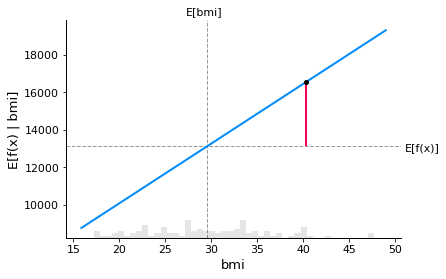

In [63]:
# make a standard partial dependence plot
sample_ind = 18
shap.partial_dependence_plot(
    "bmi", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

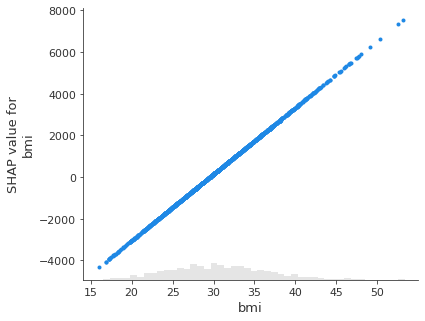

In [64]:
shap.plots.scatter(shap_values[:,"bmi"])

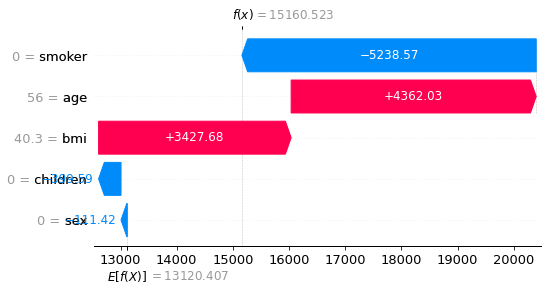

In [65]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

##LIME

In [66]:
!pip install lime

##Decision Tree

In [67]:
import lime
from pandas.core.frame import DataFrame
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

data2=data.drop(columns=['region'])

X = data2.drop('charges', axis=1)
y = data2['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

df_pd = pd.DataFrame(X_test)

In [68]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

regressor = DecisionTreeRegressor( max_depth=3,random_state=33)

regressor.fit(X_train, y_train)

y_pred=regressor.predict(X_test)

In [69]:
y_pred = regressor.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

4851.374708557071

In [71]:
import lime
import lime.lime_tabular

In [72]:
# LIME has one explainer for all the models
explainer_dtree = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  verbose=True, mode='regression')

In [73]:
j = 2
exprf = explainer_dtree.explain_instance(df_pd.values[j], regressor.predict, num_features=5)

Intercept 29873.604450449257
Prediction_local [15620.74170683]
Right: 13852.093882811234


X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


In [74]:
# Show the predictions
exprf.show_in_notebook(show_table=True)

In [75]:
exprf.as_list()

[('smoker <= 0.00', -23653.623018335915),
 ('age > 51.00', 6709.164574800423),
 ('30.50 < bmi <= 34.80', 2152.341120515342),
 ('1.00 < children <= 2.00', 655.429927646441),
 ('0.00 < sex <= 1.00', -116.1753482424513)]

For Decision Tree, age has the most positive impact followed by bmi, children, sex. While smoker has a negative impact.

##Linear Regression

In [76]:
data2=data.drop(columns=['region'])

X = data2.drop('charges', axis=1)
y = data2['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = model.predict(X_test)

In [79]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

6430.571151570943

In [80]:
explainer_linear = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                verbose=True, mode='regression')

In [81]:
j = 20
linear = explainer_linear.explain_instance(X_test.values[j], model.predict, num_features=16)

Intercept 32710.895288109787
Prediction_local [7386.63265927]
Right: 6518.784568635949


X does not have valid feature names, but LinearRegression was fitted with feature names


In [82]:
# Show the predictions
linear.show_in_notebook(show_table=True)

In [83]:
linear.as_list()

[('smoker <= 0.00', -23765.846513480246),
 ('bmi <= 26.41', -3369.382007553237),
 ('40.00 < age <= 51.00', 2098.198065313018),
 ('sex <= 0.00', -207.43058037832265),
 ('0.00 < children <= 1.00', -79.80159274361056)]


*   For Linear Regression using LIME, we can see only age has positive impact. 

*   All other features such as smoker, bmi, children, sex have a negative impact.



# Gradient Boosting Machine 

In [84]:
data2=data.drop(columns=['region'])

X = data2.drop('charges', axis=1)
y = data2['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.1)
gb_model.fit(X_train, y_train)
y_predict_gb = gb_model.predict(X_test)

In [86]:
# checking model accuracy from sklearn.metrics import r2_score, mean_squared_error 
import numpy as np

# checking model accuracy 
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
gb_mse = mean_squared_error( y_test, y_predict_gb)
gb_rmse = np.sqrt(gb_mse)
print('Root Mean Squared Error = ', round(gb_rmse, 3))
gb_r2_score = r2_score(y_test, y_predict_gb)
print('R square Score = ', round(gb_r2_score, 3))

Root Mean Squared Error =  4933.077
R square Score =  0.86


In [87]:
my_imputer = SimpleImputer()
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)

In [88]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns, class_names=['Price'], verbose=True, mode='regression')

In [89]:
i = 3
expgbm = explainer.explain_instance(X_test[i], gb_model.predict, num_features=10)
expgbm.show_in_notebook(show_table=True)

Intercept 8766.982232934015
Prediction_local [31874.95852523]
Right: 38275.27941092122


X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



*   For Gradient Boosting Machine using LIME, we can see smoker, bmi and children have a positive impact.

* Smoker has the most positive value compared to other features.

*   Remaining features such as age, sex have a negative impact.



# **Conclusion**

In this notebook we have used various models such as Linear Regression, Decision Tree Regressor, Random Forest Regressor and Gradient Boosting Machine which we got as the best model from AutoML. 

Decision Tree Regressor and Gradient Boosting Machine both perform almost same with an accuracy of around 86%. 

We have used model interpretability methods such as SHAP and LIME to better understand the contribuition of the features in these models.

The most important features for this dataset among all the models are smoker, age and bmi. Smoker being the most important feature.

# **References**

* Dataset (https://www.kaggle.com/mirichoi0218/insurance)

* Kaggle(https://www.kaggle.com/code/mahsazamanifard/insight-extraction-for-medical-cost-dataset)

* Decision Tree SHAP (https://medium.com/analytics-vidhya/shap-part-3-tree-shap-3af9bcd7cd9b)

* Lime (https://coderzcolumn.com/tutorials/machine-learning/how-to-use-lime-to-understand-sklearn-models-predictions)

* Random Forest Regressor (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

* SHAP (https://shap.readthedocs.io/en/latest/index.html)


MIT License

Copyright (c) 2022 Rituja Lolam

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.